In [93]:
import pandas as pd
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from catboost import CatBoostClassifier

In [3]:
df_train = pd.read_csv('onetwotrip_challenge_train.csv')
df_test = pd.read_csv('onetwotrip_challenge_test.csv')

In [4]:
df_train

,orderid,userid,field0,field1,field2,field3,field4,field5,field6,field7,...,indicator_goal22,indicator_goal23,indicator_goal24,indicator_goal25,goal21,goal22,goal23,goal24,goal25,goal1
0,0,10d654494cbe97bbb25d51ead2600679aff9e097924add...,0,-0.626508,11,12,1,1,0,1,...,1,0,1,1,0,1,0,0,0,0
1,1,4aafc0391f72bbcf60537aece62923baf9ce644b64ac36...,144,-0.393794,5,7,2,0,0,2,...,1,0,1,0,0,0,0,0,0,0
2,2,bac8ffef46348f587c8d17137ab01fb24aef21547c647d...,134,-0.548937,2,3,2,0,0,1,...,1,0,1,1,0,0,0,0,0,0
3,3,0392247b4b87674aba2c32bf2292b105771a6a376871be...,0,-0.238651,10,11,1,1,3,2,...,1,0,1,1,0,0,0,0,0,0
4,4,d1aeefef311bbeb4bd84876c8d49421f276674527d5578...,0,-0.704079,8,11,1,1,0,1,...,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196051,196051,e33b0b1abb0038261ea9fb5213b9aad000a7686edab9e4...,30,-0.083509,7,7,2,0,0,2,...,1,0,1,0,0,0,0,0,0,0
196052,196052,ed64c2d35a57e9e8e8e5bc84f3addf5552e1691a52a75d...,104,-0.548937,11,11,2,0,0,1,...,1,0,0,0,0,0,0,0,0,0
196053,196053,b74f63aae0b4a21b972a8a322f36e7935dbd44fe47762e...,12,0.692205,9,9,3,0,0,2,...,1,1,1,1,0,0,0,0,0,0
196054,196054,ddd567f873d77e2118458a4d4bf51643c95df4bbad7dba...,0,-0.704079,11,1,1,1,0,1,...,1,0,1,1,0,0,0,0,0,0


In [5]:
train = pd.read_csv('onetwotrip_challenge_train.csv')
# train = train.sort_values(['userid','field4']).reset_index(drop=True) # сортируем трейн по юзерам и номерам их покупок билетов
test = pd.read_csv('onetwotrip_challenge_test.csv')

train

,orderid,userid,field0,field1,field2,field3,field4,field5,field6,field7,...,indicator_goal22,indicator_goal23,indicator_goal24,indicator_goal25,goal21,goal22,goal23,goal24,goal25,goal1
0,0,10d654494cbe97bbb25d51ead2600679aff9e097924add...,0,-0.626508,11,12,1,1,0,1,...,1,0,1,1,0,1,0,0,0,0
1,1,4aafc0391f72bbcf60537aece62923baf9ce644b64ac36...,144,-0.393794,5,7,2,0,0,2,...,1,0,1,0,0,0,0,0,0,0
2,2,bac8ffef46348f587c8d17137ab01fb24aef21547c647d...,134,-0.548937,2,3,2,0,0,1,...,1,0,1,1,0,0,0,0,0,0
3,3,0392247b4b87674aba2c32bf2292b105771a6a376871be...,0,-0.238651,10,11,1,1,3,2,...,1,0,1,1,0,0,0,0,0,0
4,4,d1aeefef311bbeb4bd84876c8d49421f276674527d5578...,0,-0.704079,8,11,1,1,0,1,...,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196051,196051,e33b0b1abb0038261ea9fb5213b9aad000a7686edab9e4...,30,-0.083509,7,7,2,0,0,2,...,1,0,1,0,0,0,0,0,0,0
196052,196052,ed64c2d35a57e9e8e8e5bc84f3addf5552e1691a52a75d...,104,-0.548937,11,11,2,0,0,1,...,1,0,0,0,0,0,0,0,0,0
196053,196053,b74f63aae0b4a21b972a8a322f36e7935dbd44fe47762e...,12,0.692205,9,9,3,0,0,2,...,1,1,1,1,0,0,0,0,0,0
196054,196054,ddd567f873d77e2118458a4d4bf51643c95df4bbad7dba...,0,-0.704079,11,1,1,1,0,1,...,1,0,1,1,0,0,0,0,0,0


In [6]:
le = preprocessing.LabelEncoder()
le.fit(pd.concat([train['userid'],test['userid']]))
train['userid'] = le.transform(train['userid'])
test['userid'] = le.transform(test['userid'])

In [101]:
pd.options.display.max_columns = None
pd.options.display.max_rows = 50
train

,orderid,userid,field0,field1,field2,field3,field4,field5,field6,field7,field8,field9,field10,field11,field12,field13,field14,field15,field16,field17,field18,field19,field20,field21,field22,field23,field24,field25,field26,field27,field28,field29,indicator_goal21,indicator_goal22,indicator_goal23,indicator_goal24,indicator_goal25,goal21,goal22,goal23,goal24,goal25,goal1,tickets_per_person
0,0,24831,0,-0.626508,11,12,1,1,0,1,1,0,0,9,5,20,-0.661308,1,4,1,4,1,1,1,1,15,1,1,2,1,0,4,1,1,0,1,1,0,1,0,0,0,0,1
1,1,109973,144,-0.393794,5,7,2,0,0,2,1,0,0,21,125,3,-0.101043,1,57,1,5,1,6,2,121,15,1,41,3,1,0,2,1,1,0,1,0,0,0,0,0,0,0,2
2,2,275928,134,-0.548937,2,3,2,0,0,1,1,0,1,7,4,3,-0.661308,1,4,1,2,3,6,2,17,14,1,1,11,7,0,1,1,1,0,1,1,0,0,0,0,0,0,2
3,3,5273,0,-0.238651,10,11,1,1,3,2,1,0,0,19,12,3,-0.521242,2,22,1,3,3,4,1,46,12,2,18,1,1,0,4,1,1,0,1,1,0,0,0,0,0,0,3
4,4,309738,0,-0.704079,8,11,1,1,0,1,1,0,1,16,4,3,-0.801375,1,100,1,6,1,1,1,17,22,1,1,1,1,0,3,1,1,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196051,196051,335689,30,-0.083509,7,7,2,0,0,2,1,0,1,0,91,511,0.459223,1,4,33,7,2,3,1,1,17,1,1,3,1,0,3,1,1,0,1,0,0,0,0,0,0,0,4
196052,196052,350933,104,-0.548937,11,11,2,0,0,1,1,0,0,8,5,16,-0.521242,1,0,1,5,2,5,1,1,23,1,1,12,3,0,4,1,1,0,0,0,0,0,0,0,0,0,2
196053,196053,270822,12,0.692205,9,9,3,0,0,2,1,0,1,12,2,12,-0.101043,3,7,3,5,2,5,1,1,2,3,1,12,3,0,3,1,1,1,1,1,0,0,0,0,0,0,3
196054,196054,327701,0,-0.704079,11,1,1,1,0,1,1,0,0,23,12,3,-0.801375,2,53,1,6,2,3,1,51,23,2,1,1,1,0,4,1,1,0,1,1,0,0,0,0,0,0,3


In [156]:
train.describe()

,orderid,userid,field0,field1,field2,field3,field4,field5,field6,field7,field8,field9,field10,field11,field12,field13,field14,field15,field16,field17,field18,field19,field20,field21,field22,field23,field24,field25,field26,field27,field28,field29,indicator_goal21,indicator_goal22,indicator_goal23,indicator_goal24,indicator_goal25,goal21,goal22,goal23,goal24,goal25,goal1,tickets_per_person
count,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000
mean,98027.500000,189020.998199,28.413163,0.000912,7.980363,7.867864,3.528966,0.556214,1.577911,1.265292,0.879366,0.023937,0.448117,14.633431,12.010492,27.046028,0.001822,1.517153,15.723854,3.001301,3.811941,2.076172,3.993762,1.226471,38.751938,13.028186,1.404645,4.923456,3.875780,1.746557,0.088572,2.980837,0.994966,0.979649,0.348676,0.645754,0.647687,0.036627,0.168579,0.038713,0.022519,0.015098,0.022142,6.057932
std,56596.636526,109138.763104,69.603944,1.009651,2.757008,3.013659,12.692057,0.496831,5.614900,0.441489,0.325702,0.164366,0.497302,5.519693,19.579464,55.490962,1.007327,0.952774,25.689926,8.510708,1.931365,0.980940,1.975246,0.418548,71.517212,6.132370,0.784647,11.652149,4.230396,1.376456,0.369773,0.919229,0.070774,0.141199,0.476552,0.478285,0.477692,0.187845,0.374381,0.192912,0.148365,0.121942,0.147144,21.779353
min,0.000000,6.000000,0.000000,-0.859222,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-0.941441,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,49013.750000,94035.000000,0.000000,-0.471365,6.000000,6.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,11.000000,4.000000,3.000000,-0.521242,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,98027.500000,190004.000000,0.000000,-0.238651,8.000000,8.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,15.000000,5.000000,4.000000,-0.241109,1.000000,6.000000,1.000000,4.000000,2.000000,4.000000,1.000000,17.000000,13.000000,1.000000,1.000000,2.000000,1.000000,0.000000,3.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,147041.250000,283322.250000,13.000000,0.149205,10.000000,10.000000,2.000000,1.000000,0.000000,2.000000,1.000000,0.000000,1.000000,19.000000,11.000000,26.000000,0.179090,2.000000,18.000000,1.000000,5.000000,3.000000,6.000000,1.000000,42.000000,18.000000,2.000000,1.000000,5.000000,3.000000,0.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
max,196055.000000,378448.000000,500.000000,82.142134,12.000000,12.000000,363.000000,1.000000,323.000000,2.000000,1.000000,4.000000,1.000000,23.000000,273.000000,746.000000,55.225183,18.000000,340.000000,156.000000,7.000000,8.000000,7.000000,2.000000,867.000000,23.000000,18.000000,170.000000,28.000000,7.000000,8.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,363.000000


In [154]:
train.dtypes()

TypeError: 'Series' object is not callable

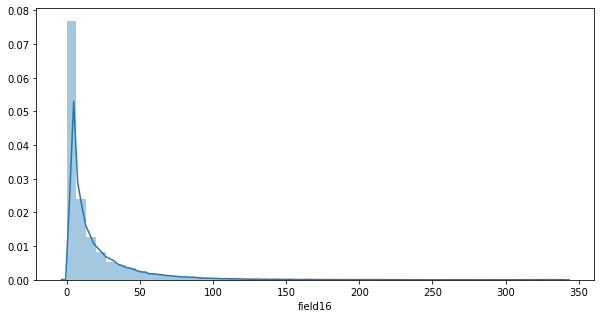

In [140]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.distplot(train['field16'])   #mb days before flight

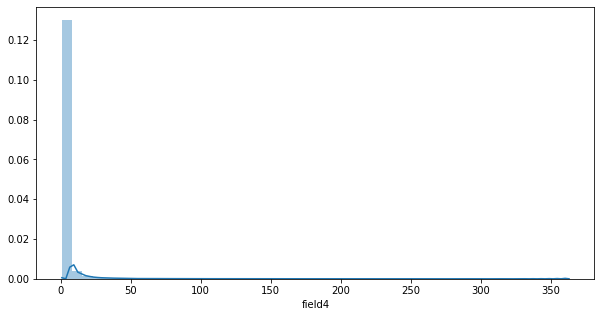

In [146]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.distplot(train['field4']) 

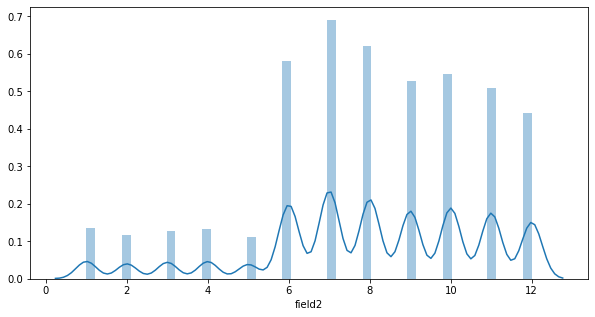

In [102]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.distplot(train['field2'])      #month

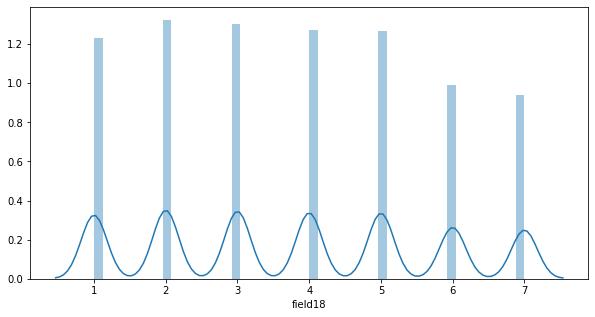

In [120]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.distplot(train['field18'])    #day of the week

In [88]:
train.field11.value_counts()   #hours

13    13232
14    13045
12    12974
15    12633
16    12421
11    12368
21    12082
20    11991
17    11953
19    11769
18    11538
22    10957
10    10296
23     8784
9      7944
0      5205
8      5030
7      2951
1      2788
6      1725
2      1431
5      1088
3       962
4       889
Name: field11, dtype: int64

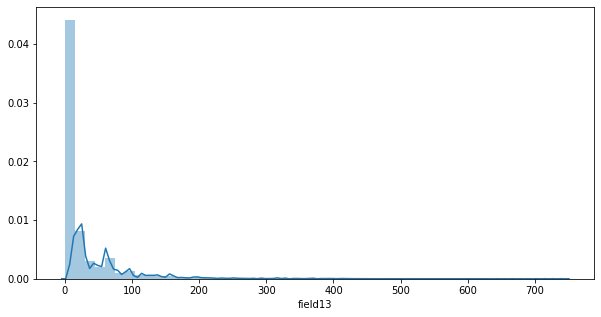

In [144]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.distplot(train['field13']) 

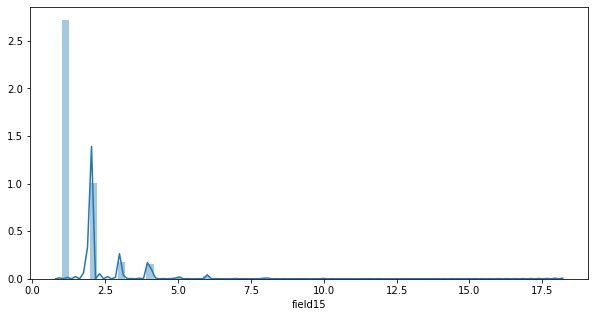

In [133]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.distplot(train['field15'], bins = 70) 

In [127]:
train['field15']

0         1
1         1
2         1
3         2
4         1
         ..
196051    1
196052    1
196053    3
196054    2
196055    4
Name: field15, Length: 196056, dtype: int64

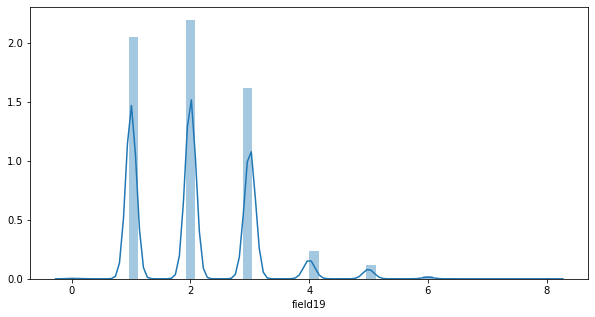

In [121]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.distplot(train['field19']) 

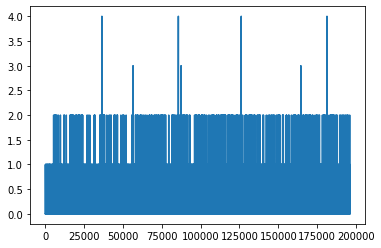

In [161]:
train['field9'].plot()    #ticket's class

In [134]:
train['field19'].value_counts()

2    68939
1    64295
3    50883
4     7419
5     3709
6      619
0      151
7       39
8        2
Name: field19, dtype: int64

In [34]:
test

,orderid,userid,field0,field1,field2,field3,field4,field5,field6,field7,...,field25,field26,field27,field28,field29,indicator_goal21,indicator_goal22,indicator_goal23,indicator_goal24,indicator_goal25
0,0,86205,0,-0.548937,10,10,1,1,0,1,...,1,1,1,0,4,1,1,0,0,1
1,1,67607,82,-0.626508,3,4,3,0,0,1,...,1,1,1,0,1,1,1,0,1,1
2,2,48355,0,-0.548937,6,8,1,1,0,2,...,35,1,1,0,2,1,0,0,1,1
3,3,351035,6,0.304348,7,7,2,0,10,1,...,1,3,1,0,3,1,1,0,1,1
4,4,241160,115,-0.471365,3,3,2,0,0,1,...,1,1,1,0,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455006,455006,338806,0,2.553918,8,8,1,1,10,2,...,41,3,1,0,3,1,1,1,1,0
455007,455007,134141,0,-0.238651,9,9,1,1,1,1,...,1,1,1,0,3,1,1,1,1,1
455008,455008,55054,0,-0.161080,10,11,1,1,0,1,...,1,1,1,0,4,1,1,1,0,0
455009,455009,130663,0,-0.704079,12,1,1,1,0,1,...,1,1,1,0,4,1,1,0,1,1


In [8]:
train.orderid.sort_values(ascending=False)

196055    196055
196054    196054
196053    196053
196052    196052
196051    196051
           ...  
4              4
3              3
2              2
1              1
0              0
Name: orderid, Length: 196056, dtype: int64

In [9]:
train.dtypes

orderid               int64
userid                int32
field0                int64
field1              float64
field2                int64
field3                int64
field4                int64
field5                int64
field6                int64
field7                int64
field8                int64
field9                int64
field10               int64
field11               int64
field12               int64
field13               int64
field14             float64
field15               int64
field16               int64
field17               int64
field18               int64
field19               int64
field20               int64
field21               int64
field22               int64
field23               int64
field24               int64
field25               int64
field26               int64
field27               int64
field28               int64
field29               int64
indicator_goal21      int64
indicator_goal22      int64
indicator_goal23      int64
indicator_goal24    

In [10]:
train.isnull().sum()

orderid             0
userid              0
field0              0
field1              0
field2              0
field3              0
field4              0
field5              0
field6              0
field7              0
field8              0
field9              0
field10             0
field11             0
field12             0
field13             0
field14             0
field15             0
field16             0
field17             0
field18             0
field19             0
field20             0
field21             0
field22             0
field23             0
field24             0
field25             0
field26             0
field27             0
field28             0
field29             0
indicator_goal21    0
indicator_goal22    0
indicator_goal23    0
indicator_goal24    0
indicator_goal25    0
goal21              0
goal22              0
goal23              0
goal24              0
goal25              0
goal1               0
dtype: int64

In [15]:
train.goal1.value_counts()

0    191715
1      4341
Name: goal1, dtype: int64

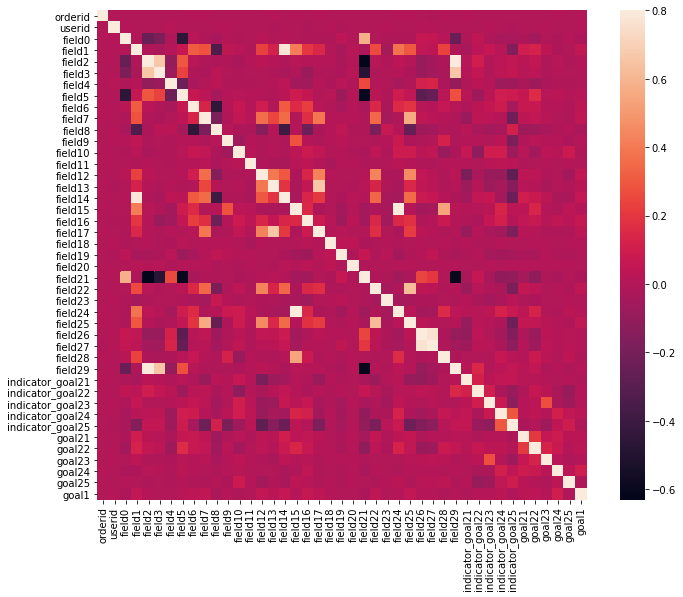

In [12]:
#correlation matrix

corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot = False, vmax=.8, square=True)

we can see high correlation between field1 and field 14, field2 and field29, field15 and field24

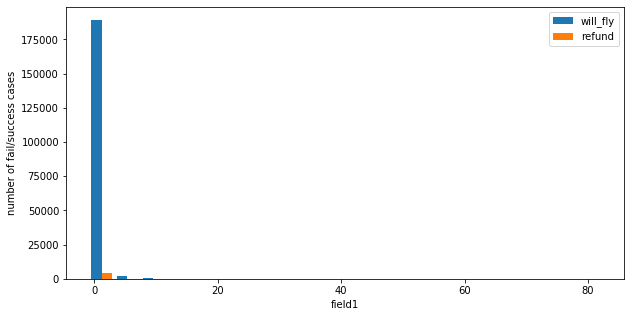

In [33]:
fail = train['field1'][train.goal1 == 0]
success = train['field1'][train.goal1 == 1]

plt.figure(figsize=(10,5))
plt.hist([fail, success], bins = 20, label = ['will_fly', 'refund'])
plt.legend()
plt.ylabel('number of fail/success cases')
plt.xlabel('field1')
plt.show()

([array([1.89195e+05, 2.09800e+03, 3.05000e+02, 7.30000e+01, 2.50000e+01,
         1.00000e+01, 3.00000e+00, 4.00000e+00, 0.00000e+00, 0.00000e+00,
         0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
         0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
  array([4.177e+03, 1.190e+02, 2.900e+01, 1.000e+01, 2.000e+00, 0.000e+00,
         1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
         1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00])],
 array([-0.8592222 ,  3.29084561,  7.44091341, 11.59098122, 15.74104903,
        19.89111683, 24.04118464, 28.19125245, 32.34132026, 36.49138806,
        40.64145587, 44.79152368, 48.94159149, 53.09165929, 57.2417271 ,
        61.39179491, 65.54186272, 69.69193052, 73.84199833, 77.99206614,
        82.14213394]),
 <a list of 2 Lists of Patches objects>)

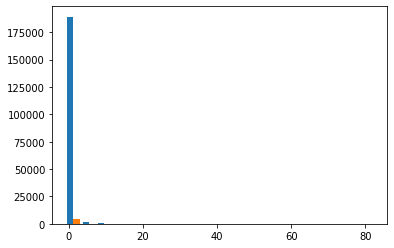

In [14]:
counts = plt.hist([fail, success], bins = 20, label = ['fail', 'success'])
counts

In [21]:
tickets_per_person = train['userid'].value_counts()
tickets_per_person

243026    363
225561    222
247456    185
164495    177
29120     149
         ... 
272030      1
334565      1
68327       1
357096      1
4098        1
Name: userid, Length: 113902, dtype: int64

In [26]:
train['tickets_per_person'] = train['userid'].map(tickets_per_person)

In [83]:
train['tickets_per_person'].value_counts()

1     78149
2     41418
3     21171
4     12764
5      7970
      ...  
61       61
58       58
57       57
54       54
49       49
Name: tickets_per_person, Length: 71, dtype: int64

In [85]:
train['tickets_per_person'][train.goal1 == 1].value_counts()

1      1774
2       919
3       484
4       277
5       177
6       123
7        68
8        63
9        54
10       41
12       35
11       31
13       29
22       24
18       21
15       19
16       17
222      16
14       13
17       11
363      10
26        9
44        9
145       8
48        7
33        6
25        6
21        6
41        6
27        5
23        5
43        4
96        4
53        4
40        3
36        3
30        3
38        3
45        3
24        3
20        3
79        3
177       3
39        3
54        3
28        2
32        2
42        2
70        2
80        2
29        2
57        2
58        2
88        1
50        1
122       1
65        1
35        1
185       1
19        1
Name: tickets_per_person, dtype: int64

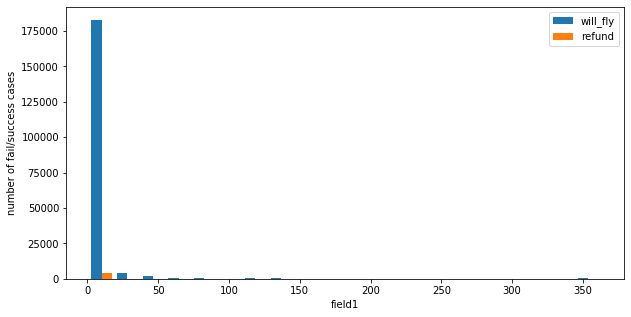

In [39]:
fail = train['tickets_per_person'] [train.goal1 == 0]
success = train['tickets_per_person'] [train.goal1 == 1]

plt.figure(figsize=(10,5))
plt.hist([fail, success], bins = 20, label = ['will_fly', 'refund'])
plt.legend()
plt.ylabel('number of fail/success cases')
plt.xlabel('tickets_per_person')
plt.show()

In [70]:
train_part2 = train[train['tickets_per_person'] > 10]

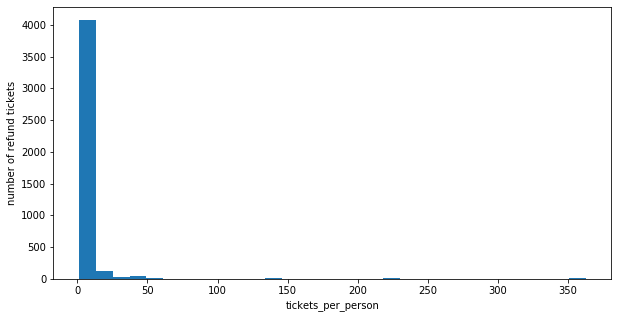

In [86]:
# fail = train['tickets_per_person'] [train.goal1 == 0]
success = train['tickets_per_person'][train.goal1 == 1]

plt.figure(figsize=(10,5))
plt.hist(success, bins = 30)
# plt.legend()
plt.ylabel('number of refund tickets')
plt.xlabel('tickets_per_person')
plt.show()

In [38]:
train['goal1'][train['tickets_per_person'] > 350].value_counts()

0    353
1     10
Name: goal1, dtype: int64

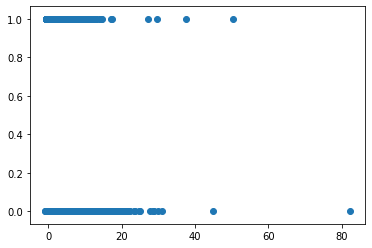

In [79]:
plt.scatter(train['field1'], train['goal1'])